In [ ]:
# Import the necessary packages

!pip install prince
!pip install kmodes

In [ ]:
# Import the necessary packages

import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io.formats.info import DataFrameInfo
from sklearn.decomposition import FactorAnalysis
import scipy.stats as stats
import prince
import matplotlib.pyplot as plt
from google.colab import files

from kmodes.kmodes import KModes

import random
random.seed(0)

In [ ]:
# Read the excel file

df = pd.read_excel('rohingya.xlsx')
df.head(200)

,Row ID,Sex,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How satisfied are you with the overall help you and your family have been receiving from NGOs?,How do you mostly hear about the news?,Who do you consider the most important person in your camp?,"Other than family, who do you go to when you have a problem?",Do you have enough good friends in the camp?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How much do you trust the police/military/guards of camps in Bangladesh?,How much do you trust the NGOs in the camp?,How much do you trust the Majhis?,How much do you trust the Imam (religious leader)?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,In what countries are they now?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,In what countries are they now?.1,Do you often feel stressed or overwhelmed by your situation?,Do you prefer talking about your problems with others or trying to forget what you are going through?,Do you prefer solving your problems alone or by asking others for their help?,Does talking about your every day problems with others make you feel better?,How comfortable do you feel talking about your problems with NGO workers?,Do you think the situation in the camp is better now or 6 months ago?,Do you smoke cigarettes?,How many cigarettes a day on average?,Did you also smoke before coming to Bangladesh?,Do you chew betel nuts?,How many betel nuts a day on average?,Did you also chew before coming to Bangladesh?,Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?,Have you ever seen any Rohingya in the camp use medicine or syrup often without needing it?,Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?,Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?,Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?,How often do you hear people talking about violent groups in the camp?,How do you think violence in the camp has changed over time?,Do you think that sexual harassment in the camp happens often?,Where does sexual harassment happen the most?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you t

In [ ]:
# Show a summary of the data
pd.set_option('display.max_columns', None)
info = df.info(verbose = True)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 71 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   Row ID                                                                                                                               1277 non-null   int64  
 1   Sex                                                                                                                                  1277 non-null   object 
 2   How satisfied are you with the amount of space allocated to you and your family in the camp?                                         1277 non-null   object 
 3   How satisfied are you with the level of hygiene and sanitation in the camp?   

In [ ]:
# Go through the data and find unique values

for questions in df.columns:
  print(questions)
  responses = pd.unique(df[questions])
  print(responses)

  print('====================================================')

Row ID
[11584 11585 11586 ... 13039 13040 13041]
Sex
['Female' 'Male']
How satisfied are you with the amount of space allocated to you and your family in the camp?
['Unsatisfied' 'Satisfied' 'Very unsatisfied' 'Very satisfied']
How satisfied are you with the level of hygiene and sanitation in the camp?
['Satisfied' 'Unsatisfied' 'Neither satisfied nor unsatisfied'
 'Very satisfied' 'Very unsatisfied']
Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?
['Yes' 'No']
How satisfied are you with the quality of healthcare you and your family are receiving in the camp?
['Unsatisfied' 'Neither satisfied nor unsatisfied' 'Very unsatisfied'
 'Satisfied' 'Very satisfied']
How satisfied are you with the level of psychological support you and your family are receiving in the camp?
['Unsatisfied' 'Satisfied' 'Neither satisfied nor unsatisfied'
 'Very satisfied' 'Very unsatisfied']
How satisfied are you with the level of social support you an

In [ ]:
# Visualize number of nones
info = DataFrameInfo(df)
infodf = pd.DataFrame(
  {'Column': info.ids,
   'Non-Null Count':info.non_null_counts,
   'Dtype':info.dtypes})

pd.set_option('display.max_rows', None)
infodf.sort_values(by = 'Non-Null Count', ascending = True)

,Column,Non-Null Count,Dtype
In what countries are they now?.1,In what countries are they now?.1,4,object
Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?,Have you ever seen any Rohingya in the camp us...,8,object
Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,Do you personally know any Rohingya family who...,14,object
Where did they go?,Where did they go?,17,object
Have you ever seen any Rohingya in the camp use medicine or syrup often without needing it?,Have you ever seen any Rohingya in the camp u...,22,object
How many cigarettes a day on average?,How many cigarettes a day on average?,252,float64
Did you also smoke before coming to Bangladesh?,Did you also smoke before coming to Bangladesh?,252,object
Where does sexual harassment happen the most?,Where does sexual harassment happen the most?,346,object
In what countries are they now?,In what countries are they now?,686,object
Did you also chew before coming to Bangladesh?,Did you also chew before coming to Bangladesh?,735,object


In [ ]:
# Fill in or remove the rows

df['Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?'] = df['Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?'].fillna("I don't want to answer")
df['Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?'] = df['Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?'].fillna('No')
df['How many cigarettes a day on average?'] = df['How many cigarettes a day on average?'].fillna(0)
df['How many betel nuts a day on average?'] = df['How many betel nuts a day on average?'].fillna(0)
df['Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?'] = df['Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?'].fillna('Unsure')
df['Are you willing to go?'] = df['Are you willing to go?'].fillna('Unsure')
df['Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?	'] = df['Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?'].fillna("I don't want to answer")
df['Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?'] = df['Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?'].fillna("I don't want to answer")
df['Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?'] = df['Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?'].fillna("I don't want to answer")
df['Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?'] = df['Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?'].fillna('No')

df.head()
df = df.drop(columns = ['In what countries are they now?.1', 'Where did they go?', 'Have you  ever seen any Rohingya in the camp use medicine or syrup often without needing it?',
                        'Did you also smoke before coming to Bangladesh?', 'Where does sexual harassment happen the most?', 'In what countries are they now?', 'Did you also chew before coming to Bangladesh?', 'Row ID',
                        'Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?\t',
])

# Remove empty data
df = df.dropna()
df.head()

,Sex,How satisfied are you with the amount of space allocated to you and your family in the camp?,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,How satisfied are you with the level of psychological support you and your family are receiving in the camp?,How satisfied are you with the level of social support you and your family receive from neighbours and friends?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How satisfied are you with the overall help you and your family have been receiving from NGOs?,How do you mostly hear about the news?,Who do you consider the most important person in your camp?,"Other than family, who do you go to when you have a problem?",Do you have enough good friends in the camp?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How much do you trust the police/military/guards of camps in Bangladesh?,How much do you trust the NGOs in the camp?,How much do you trust the Majhis?,How much do you trust the Imam (religious leader)?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,Do you often feel stressed or overwhelmed by your situation?,Do you prefer talking about your problems with others or trying to forget what you are going through?,Do you prefer solving your problems alone or by asking others for their help?,Does talking about your every day problems with others make you feel better?,How comfortable do you feel talking about your problems with NGO workers?,Do you think the situation in the camp is better now or 6 months ago?,Do you smoke cigarettes?,How many cigarettes a day on average?,Do you chew betel nuts?,How many betel nuts a day on average?,Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?,Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?,Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?,Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?,How often do you hear people talking about violent groups in the camp?,How do you think violence in the camp has changed over time?,Do you think that sexual harassment in the camp happens often?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Do you know that the Bangladesh gove

In [ ]:
# Seperate questions to categories

always = ['Sex', 'How do you mostly hear about the news?', 'How often do you talk with Rohingya people outside Bangladesh and Myanmar?',
          'How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?',
          'Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?',
          'Where do you think you will be in six months from now?',
          'How satisfied are you with the level of hygiene and sanitation in the camp?',
          'Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?',
          'How satisfied are you with the quality of healthcare you and your family are receiving in the camp?',
          'Do you think you are able to exercise your religion freely in the camp?',
          'How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?',
          'Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?',
          'Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?',
          'Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?',
          'How satisfied are you with the quality of education you and your family are receiving in the camp?',
          'How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?',
          'How satisfied are you with the income your family makes in the camp?',
          'How afraid are you to leave your child unattended in the camp after it gets dark?',
          'Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?',
          'Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?',
          'Do you consider any Bangladeshis as your friends?',
          'Do you believe Rohingya and Bangladeshis can be good friends?',
          'Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?',
          'Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?'
          ]

refugee_moving = ['Are you willing to go?', 'Do you know that the Bangladesh government plans on moving Rohingya to Bhasan Char?']

camp_conditions = [
    'How satisfied are you with the amount of space allocated to you and your family in the camp?',
    'Do you think the situation in the camp is better now or 6 months ago?'
]

violence = ['How do you think violence in the camp has changed over time?',
            'How often do you hear people talking about violent groups in the camp?',
            'Do you think that sexual harassment in the camp happens often?']

other_support = ['How satisfied are you with the level of social support you and your family receive from neighbours and friends?',
                 'Do you have enough good friends in the camp?',
                 'How satisfied are you with the level of psychological support you and your family are receiving in the camp?',


]

access_to_help = ['How satisfied are you with the overall help you and your family have been receiving from NGOs?',
                  'Who do you consider the most important person in your camp?',
                  'Other than family, who do you go to when you have a problem?',
                  'Who do you consider the most important person in your camp?',
                  'Other than family, who do you go to when you have a problem?',
                  'Do you prefer talking about your problems with others or trying to forget what you are going through?',
                  'Do you prefer solving your problems alone or by asking others for their help?',
                  'Does talking about your every day problems with others make you feel better?'
]


trust = ['How much do you trust the police/military/guards of camps in Bangladesh?',
         'How much do you trust the NGOs in the camp?',
         'How much do you trust the Majhis?',
         'How much do you trust the Imam (religious leader)?',
         'How comfortable do you feel talking about your problems with NGO workers?'
         ]

mental_health = ['Do you often feel stressed or overwhelmed by your situation?',
                 'Do you smoke cigarettes?',
                 'How many cigarettes a day on average?',
                 'Do you chew betel nuts?',
                 'How many betel nuts a day on average?'
                 ]

illegal_use = ['Do you think that there are Rohingya in the camp who use medicine or drink syrup often without needing it?',
            'Do you think that there are Rohingya in the camp who use illegal substances (like alcohol or drugs)?',
            'Have you ever seen any Rohingya in the camp use illegal substances (like alcohol or drugs)?',
            'Do you think that there are Rohingya in the camp who are involved in illegal activities (like selling/transporting drinks or yaba)?'
            ]


myanmar_rights_views = ['Do you think that the government of Myanmar will recognize the rights of Rohingya in the next two years?',
                'If the Myanmar government recognizes the rights of Rohingya in the next two years, will you return to Myanmar?',
                'Do you think that repatriation to Myanmar will happen in the next two years?'
                ]

people_leaving = ['Do you personally know any Rohingya who left Bangladesh in the last six months?',
                  'Have you thought about leaving to go to another country other than Myanmar and Bangladesh?',
                  'How scared are you to leave for another country?',
                  'If you could choose any country in the world, other than Myanmar, where would you go?',
                  'Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?']


Testing for number of clusters: 1
Testing for number of clusters: 2
Testing for number of clusters: 3
Testing for number of clusters: 4
Testing for number of clusters: 5
Testing for number of clusters: 6
Testing for number of clusters: 7
Testing for number of clusters: 8
Testing for number of clusters: 9


<Axes: xlabel='Cluster', ylabel='Cost'>

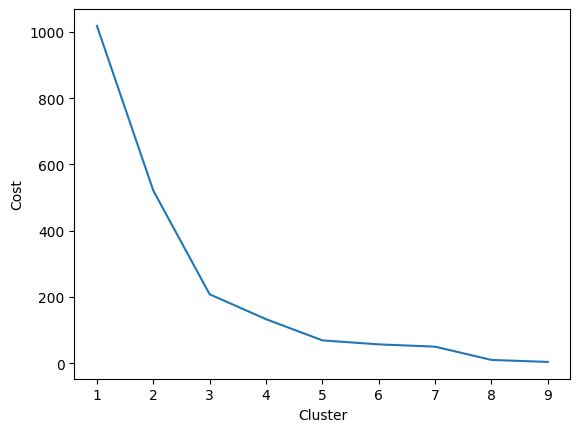

In [ ]:
# Use the KModes Algorithm

cost = []
cluster = []

curr_df = df[camp_conditions]

for num_clusters in range(1, 10):
  print(f"Testing for number of clusters: {num_clusters}")
  kmode = KModes(n_clusters = num_clusters, init = 'Huang', n_init = 10, random_state = 0)
  kmode.fit_predict(curr_df)
  cluster.append(num_clusters)
  cost.append(kmode.cost_)

results = pd.DataFrame({'Cluster': cluster, 'Cost': cost})
sns.lineplot(results, x = 'Cluster', y = 'Cost')

In [ ]:
# Optimal number is 5 clusters
kmode = KModes(n_clusters = 3, init = 'Huang', n_init = 10)
clusters = kmode.fit_predict(curr_df)

curr_df.insert(0, "Cluster", clusters, True)
curr_df.head(100)

,Cluster,How satisfied are you with the amount of space allocated to you and your family in the camp?,Do you think the situation in the camp is better now or 6 months ago?
14,0,Unsatisfied,same-nothing has changed
18,1,Satisfied,same-nothing has changed
19,0,Unsatisfied,same-nothing has changed
20,0,Unsatisfied,same-nothing has changed
21,0,Unsatisfied,same-nothing has changed
22,1,Satisfied,same-nothing has changed
23,1,Satisfied,same-nothing has changed
24,0,Unsatisfied,six months ago
25,0,Unsatisfied,same-nothing has changed
26,0,Unsatisfied,same-nothing has changed


In [ ]:
def obtain_visualizations(cluster: int, dataframe, pathname: str):
  """Take in a dataframe and obtain the visualizations for the proportions of each column.

  # Pre condition: Must have a 'Cluster' column.
  """

  # Filter the data for one cluster
  data = dataframe[dataframe['Cluster'] == cluster]
  columns = dataframe.columns

  for col in columns[1:]: # Go through every column (Except Cluster)
    counts = pd.DataFrame(data[col].value_counts())
    filename = f"Cluster_{cluster}_{col}"
    index = list(counts.index) # Set index
    plot = {"Variables": index, "Counts": []}

    for item in counts.to_dict("records"):
      value = item[col]
      plot["Counts"].append(value)

    # plot the data and then save it
    plot = pd.DataFrame(plot)
    sns.barplot(plot, x = "Variables", y = "Counts").set(title = col)
    try:
      plt.savefig(pathname) # Otherwise, file path is too long
      #files.download(f'{filename}.png')
    except:
      print(f"Problem with: {col}")

    plt.show()

In [ ]:
# Optimal clusters: Append them accordingly!

optimal_clusters = {
    'Camp Condition': (3, camp_conditions),
    'Violence': (5, violence),
    'Personal Support': (5, other_support),
    'Access to Help': (4, access_to_help),
    'Trust': (7, trust),
    'Mental Health': (5, mental_health),
    'Myanmar Rights Views': (4, myanmar_rights_views),
    'People Leaving': (6, people_leaving),
    'Illegal Activity': (3, illegal_use),
    'Bhasan Char': (4, refugee_moving)
}

for title in optimal_clusters:
  cluster, features = optimal_clusters[title]
  curr_df = df[features]

  print(f'Currently on: {title}')

  # Fit K Modes
  kmode = KModes(n_clusters = cluster, init = 'Huang', n_init = 10, random_state = 0)
  clusters = kmode.fit_predict(curr_df)
  df.insert(0, title, clusters, True)
  df = df.drop(columns = features)

df.head(100)


Currently on: Camp Condition
Currently on: Violence
Currently on: Personal Support
Currently on: Access to Help
Currently on: Trust
Currently on: Mental Health
Currently on: Myanmar Rights Views
Currently on: People Leaving
Currently on: Illegal Activity
Currently on: Bhasan Char


,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,Sex,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How do you mostly hear about the news?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
14,0,2,0,0,4,1,0,0,1,2,Female,Satisfied,Yes,Very unsatisfied,Yes,Very satisfied,Yes,No,No,Unsatisfied,Satisfied,Unsatisfied,Friends and neighbours,No,Yes,No,No,Never,Never,Very afraid,No,Unsure,Very little,Can't imagine/I am not sure where I will be,very positive
18,3,2,2,0,4,5,0,0,1,0,Female,Unsatisfied,No,Very unsatisfied,Yes,Very satisfied,Yes,No,No,Unsatisfied,Very unsatisfied,Unsatisfied,Friends and neighbours,Yes,Yes,No,No,Three times a month,Never,Very afraid,Yes,Yes,Very little,"Here, in the camp",very positive
19,0,2,1,1,3,0,0,0,1,2,Female,Unsatisfied,Yes,Unsatisfied,Yes,Very satisfied,Yes,Yes,Yes,Unsatisfied,Unsatisfied,Very unsatisfied,Friends and neighbours,Yes,No,No,No,Three times a month,Never,I don't have children - does not apply,Yes,No,Very little,Myanmar/Motherland,very positive
20,0,0,5,0,4,3,0,1,0,2,Female,Very satisfied,Yes,Satisfied,Yes,Very satisfied,Yes,No,No,Very unsatisfied,Satisfied,Unsatisfied,"Social media (e.g. Facebook, Twitter, Instagram)",Yes,Yes,No,No,Never,Never,Very afraid,Yes,No,Very little,"Here, in the camp",positive
21,0,1,2,1,2,5,0,0,2,2,Female,Satisfied,Yes,Very unsatisfied,Yes,Very satisfied,Yes,No,No,Unsatisfied,Unsatisfied,Unsatisfied,Friends and neighbours,No,No,No,No,Never,Never,Afraid,Yes,No,Very little,Another (peaceful) place/country,very positive
22,0,0,0,1,0,4,0,2,2,0,Female,Satisfied,Yes,Unsatisfied,Yes,Very satisfied,Yes,No,No,Satisfied,Unsatisfied,Unsatisfied,"Social media (e.g. Facebook, Twitter, Instagram)",No,No,No,No,Never,Never,Not afraid,Yes,No,To a great extent,"Here, in the camp",positive
23,0,2,1,0,2,1,3,1,1,0,Female,Unsatisfied,Yes,Unsatisfied,Yes,Very satisfied,Yes,No,No,Unsatisfied,Very unsatisfied,Unsatisfied,Friends and neighbours,No,Yes,No,No,Three times a month,Never,Very afraid,Yes,No,Very little,"

In [ ]:
# Transform the data and remove unnecessary data not related to the measurement of the satisfaction index
"""
to_remove = ['Where do you think the majority of Rohingya would choose to go if they could choose freely (apart from Myanmar)?',
             'If you could choose any country in the world, other than Myanmar, where would you go?', 'Row ID'
             ]

df = df.drop(columns = to_remove)
"""

# Create dummy variables
dummy = df.copy()

gender = {'Male': 0, 'Female': 1}
satisfaction = {'Very unsatisfied': 0, 'Unsatisfied': 1, 'Neither satisfied nor unsatisfied': 2, 'Satisfied': 3, 'Very satisfied': 4}
yes_or_no = {'Yes': 2, 'No': 0, "I don't want to answer": 1, "Unsure": 1}
trust = {'No trust at all': 0, 'Little trust': 1, 'Quite a bit of trust': 2, 'A lot of trust': 3, 'Neither trust nor distrust': 4}
news = {'Social media (e.g. Facebook, Twitter, Instagram)': 0, 'Radio': 1, 'Newspaper or magazines': 2, 'Friends and neighbours': 3, 'Family': 4}
comfort = {'Very uncomfortable': 0, 'Uncomfortable': 1, 'Neither comfortable nor uncomfortable': 2, 'Comfortable enough': 3, 'Very comfortable': 4}
fear = {'very scared': 0, 'scared': 1, 'neither scared nor not scared': 2, 'not scared': 3, 'not at all scared': 4}
future_location = {'No reply/No comment': 0, 'Myanmar/Motherland': 1, 'Malaysia': 2, 'Here, in the camp': 3, 'Here, in the camp ': 3,
                   'Depends on what the government will decide': 5, 'Depends on luck': 6, "Can't imagine/I am not sure where I will be": 7, 'Bhasan Char': 8,
                   'Another (peaceful) place/country': 9, 'Allah knows': 10}

# Religious figures = 0, Neighbours = 1, CIC = 2, educated person = 3, family = 4, UNHCR = 5, Army = 6
helpers = {'Religious elders': 0, 'Neighbor': 1, 'Imam': 0, 'Head of Manhood, CIC': 2, 'Head Majhi, Religious Elders': 0, 'Head Majhi, Imam': 0, 'Head Majhi': 0, 'Community Elders': 7, 'Block Mahji': 0, 'Head Mahji': 0,
           'Neighbour': 1, 'Educated person': 3, 'Parents': 4, 'Head Majhi, Community Elders': 0, "Madrasha's Imam": 0, 'Husband': 4, 'UNHCR': 5,
           'Head Majhi, CIC': 0, 'Head Majhi': 0, 'CIC': 2, 'Block Majhi, Religious Elders': 0, 'Block Majhi, Imam': 0, 'Block Majhi, Community Elders': 0, 'Block Majhi': 0, 'Army, Block Majhi': 0, 'Army': 6}
solving_problems = {'trying to forget': 0, 'talking': 1}
method_solving_problems = {'I solve my problems myself': 0, 'I ask for help': 1}

# Less than a month = 0, Less than a year = 1
time = {'Three times a month': 3, 'Once a year': 4, 'Once a week': 5, 'Once a month': 6, 'Never': 0, 'More than once a week': 1, 'Every few months': 2, 'A few times a month': 6, 'A few times a year': 7, 'A few times a week': 8
}
change = {'six months ago': 0, 'same-nothing has changed': 1, 'now': 2}
increase = {'Same': 2, 'Increased a lot': 4, 'Increased': 3, 'Decreased a lot': 0, 'Decreased': 1}
homeliness = {'Very little':1, 'Not at all': 0, 'Somewhat': 2, 'To a great extent': 3}
children_status = {'Very afraid': 0, 'Not afraid':1,  'Afraid':2, "I don't have children - does not apply": 3}
future_feeling = {'positive':3, 'neither positive nor negative':2, 'very positive':4, 'negative':1, 'very negative':0}



# Map the dummy variables (Note that each category has unique keys due to the way the data is set up)
key_mappings = {'Same': increase, 'now': change, 'Never': time, 'I ask for help': method_solving_problems, 'talking': solving_problems, 'CIC': helpers, 'Allah knows': future_location, 'scared': future_location,
                'Uncomfortable': comfort, 'Radio': news, 'Little trust': trust, 'Yes': yes_or_no, 'Satisfied': satisfaction, 'Male': gender, 'scared': fear, 'Afraid': children_status, 'To a great extent': homeliness,
                'positive': future_feeling}

for questions in dummy.columns:
  uniques = pd.unique(dummy[questions])

  for item in key_mappings:
    if item in uniques:
      dummy.replace({questions: key_mappings[item]}, inplace=True)


dummy.head()

<ipython-input-929-97f77c6638da>:51: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item in uniques:


,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,Sex,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How do you mostly hear about the news?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
14,0,2,0,0,4,1,0,0,1,2,1,3,2,0,2,4,2,0,0,1,3,1,3,0,2,0,0,0,0,0,0,1,1,7,4
18,3,2,2,0,4,5,0,0,1,0,1,1,0,0,2,4,2,0,0,1,0,1,3,2,2,0,0,3,0,0,2,2,1,3,4
19,0,2,1,1,3,0,0,0,1,2,1,1,2,1,2,4,2,2,2,1,1,0,3,2,0,0,0,3,0,3,2,0,1,1,4
20,0,0,5,0,4,3,0,1,0,2,1,4,2,3,2,4,2,0,0,0,3,1,0,2,2,0,0,0,0,0,2,0,1,3,3
21,0,1,2,1,2,5,0,0,2,2,1,3,2,0,2,4,2,0,0,1,1,1,3,0,0,0,0,0,0,2,2,0,1,9,4


In [ ]:
# Change the Myanmar Rights Views
dummy.loc[dummy['Myanmar Rights Views'] == 2, 'Myanmar Rights Views'] = 3
dummy.loc[dummy['Myanmar Rights Views'] == 3, 'Myanmar Rights Views'] = 2

# Change Illegal Use for descending order based on the cluster analysis (Reorder accordingly)
dummy.loc[dummy['Illegal Activity'] == 1, 'Illegal Activity'] = 0
dummy.loc[dummy['Illegal Activity'] == 0, 'Illegal Activity'] = 1

dummy.head(100)

,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,Sex,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How do you mostly hear about the news?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
14,0,2,0,0,4,1,0,0,1,2,1,3,2,0,2,4,2,0,0,1,3,1,3,0,2,0,0,0,0,0,0,1,1,7,4
18,3,2,2,0,4,5,0,0,1,0,1,1,0,0,2,4,2,0,0,1,0,1,3,2,2,0,0,3,0,0,2,2,1,3,4
19,0,2,1,1,3,0,0,0,1,2,1,1,2,1,2,4,2,2,2,1,1,0,3,2,0,0,0,3,0,3,2,0,1,1,4
20,0,1,5,0,4,3,0,1,0,2,1,4,2,3,2,4,2,0,0,0,3,1,0,2,2,0,0,0,0,0,2,0,1,3,3
21,0,1,2,1,2,5,0,0,2,2,1,3,2,0,2,4,2,0,0,1,1,1,3,0,0,0,0,0,0,2,2,0,1,9,4
22,0,1,0,1,0,4,0,2,2,0,1,3,2,1,2,4,2,0,0,3,1,1,0,0,0,0,0,0,0,1,2,0,3,3,3
23,0,2,1,0,2,1,3,1,1,0,1,1,2,1,2,4,2,0,0,1,0,1,3,0,2,0,0,3,0,0,2,0,1,3,4
24,0,1,2,0,0,5,0,2,2,1,1,1,2,3,2,4,2,0,0,0,1,0,3,0,0,0,0,0,0,0,2,0,1,1,4
25,0,2,3,0,3,1,0,0,1,2,1,3,2,3,2,4,2,0,0,1,0,0,3,0,2,2,0,0,0,0,2,0,1,3,3
26,0,2,2,0,3,1,0,1,3,2,1,3,2,1,2,4,2,0,0,0,3,3,0,2,2,0,0,0,0,0,2,0,1,3,4


In [ ]:
# Save the dummy variables

dummy.to_csv('dummy.csv')

In [ ]:
# Find the correlation between columns and how you feel about the future (Use Matthew's Correlation Coefficient)
from sklearn.metrics import matthews_corrcoef # For How do you feel about the future?

dummy_copy = dummy.copy() # Copy used for coefficient analysis only
# dummy_copy.drop(columns = ['How many betel nuts a day on average?', 'How many cigarettes a day on average?'])

# Analysis for the Matthew's Correlation Coefficient
coefficient = {"Questions": dummy_copy.columns}

# Get the correlation coefficients
for item in dummy_copy.columns:
  curr = dummy_copy[item] # Get the column
  curr = curr.to_numpy()
  coef_list = []

  for q in dummy_copy.columns:
    Y = dummy_copy[q].to_numpy()

    coef = matthews_corrcoef(curr, Y)
    coef_list.append(coef)

  coefficient[item] = coef_list

coefficient = pd.DataFrame(coefficient)

pd.set_option('display.max_rows', None)
coefficient.head(100)

,Questions,Bhasan Char,Illegal Activity,People Leaving,Myanmar Rights Views,Mental Health,Trust,Access to Help,Personal Support,Violence,Camp Condition,Sex,How satisfied are you with the level of hygiene and sanitation in the camp?,"Do you think there are enough healthcare facilities for Rohingya (like aid station, health centre, hospital)?",How satisfied are you with the quality of healthcare you and your family are receiving in the camp?,Do you think you are able to exercise your religion freely in the camp?,"How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?",Do you think there are enough educational opportunities for Rohingya children below the age of 12 in the camp?,Do you think there are enough educational opportunities for Rohingya adolescents (between 12 and 18 years old) in the camp?,Do you think there are enough educational opportunities for Rohingya adults (older than 18 years old) in the camp?,How satisfied are you with the quality of education you and your family are receiving in the camp?,How satisfied are you with the number of job opportunities available to Rohingya adults in the camp?,How satisfied are you with the income your family makes in the camp?,How do you mostly hear about the news?,Do you consider any Bangladeshis as your friends?,Do you believe Rohingya and Bangladeshis can be good friends?,Do you think that there are Rohingya families who have married their daughter off to Bangladeshi boys/men?,Do you personally know any Rohingya family who has married their daughter off to a Bangladeshi boy/man?,How often do you talk with Rohingya people outside Bangladesh and Myanmar?,How often do you talk with others (non-Rohingya people) outside Bangladesh and Myanmar?,How afraid are you to leave your child unattended in the camp after it gets dark?,Do you think that there are Rohingya families whose child has gone missing since they moved to Bangladesh?,Do you personally know any Rohingya families whose child has gone missing since they moved to this camp?,To what extent do you feel at home in the camp in Bangladesh now?,Where do you think you will be in six months from now?,How do you feel about the future?
0,Bhasan Char,1.000000,0.113618,0.010490,-0.020695,-0.029834,-0.015812,-0.042969,-0.021230,0.009032,-0.056695,0.027010,-0.024222,-0.008807,0.009869,0.007211,-0.022750,0.007211,0.087246,0.043202,-0.028188,0.042068,0.059474,0.002645,0.118535,0.019521,0.015516,0.061618,-0.041980,-0.009724,0.148203,-0.087578,0.062958,-0.073427,-0.025606,0.031365
1,Illegal Activity,0.113618,1.000000,0.039194,-0.063248,0.012829,-0.051846,0.001595,-0.075277,-0.094778,0.068228,-0.054038,-0.049890,-0.086357,0.062684,0.004472,0.000784,0.004472,0.046381,0.052204,0.021416,0.027847,-0.012101,-0.003688,0.027046,-0.107833,0.154526,0.070994,0.037809,-0.002585,0.071107,-0.050363,-0.019399,-0.065997,0.012216,0.077229
2,People Leaving,0.010490,0.039194,1.000000,-0.017772,0.049450,-0.034784,0.059652,-0.090134,-0.078468,0.078879,-0.018017,0.024774,-0.014091,0.012144,-0.014903,-0.120952,0.000880,-0.001526,-0.001392,0.027101,0.114840,-0.112049,0.000404,0.078760,-0.035103,0.016401,-0.001078,0.016126,-0.004024,-0.021342,-0.054278,0.002494,0.130553,0.026175,-0.105627
3,Myanmar Rights Views,-0.020695,-0.063248,-0.017772,1.000000,0.000734,-0.072003,-0.012592,0.342238,-0.274760,0.047740,0.075523,0.000161,-0.065371,-0.022493,0.027336,0.001088,-0.011813,-0.013465,-0.030879,0.001992,-0.083195,-0.135317,-0.041435,0.352874,0.037226,-0.054578,-0.033493,0.050120,0.023294,-0.100012,-0.031495,-0.013847,0.196455,-0.005572,-0.038637
4,Mental Health,-0.029834,0.012829,0.049450,0.000734,1.000000,-0.011726,0.048133,-0.003941,-0.056425,0.120513,-0.206565,0.017213,0.015688,-0.011856,-0.040108,0.000088,-0.023483,-0.007333,-0.010201,-0.006421,-0.046987,-0.004582,-0.023847,-0.058265,-0.024554,0.004459,-0.032340,0.105710,-0.000750,-0.029626,0.013740,0.010206,0.028856,0.051811,-0.032848
5,Trust,-0.015812,-0.051846,-0.034784,

In [ ]:
# Correlation matrix is too large

def view_correlation(coef, index: int) -> int:
  """Take in an index and then return the sorted numbers."""

  df = coef.iloc[:, [0, index]]
  column = coef.columns[index]
  df = df.sort_values(column, ascending = False)

  return df

def obtain_features(coef, cut_off = 0.15) -> list:
  """Obtain the features after viewing correlation in list format.
  """

  features = []

  for item in coef.to_dict('records'):
    correlation = item[coef.columns[-1]]
    curr_index = coef.columns[0]
    question = item[curr_index]

    if np.abs(correlation) >= cut_off:
      features.append(question)

  return features

def create_features(curr: list, features: list) -> list:
  """Take in a current and features list and then append items from features to current, and then return them."""

  for item in features:
    if not (item in curr):
      curr.append(item)

  return curr

# View the correlation: How do you feel about the future?

curr = view_correlation(coefficient, 35)
future_features = obtain_features(curr)

# View the correlation: To what extent do you feel at home in the camp in Bangladesh now?

curr = view_correlation(coefficient, 33)
home_features = obtain_features(curr)

# View the correlation: Do you often feel stressed or overwhelmed by your situation?

#curr = view_correlation(coefficient, 31)
#stress_features = obtain_features(curr)

# Final list of features

features = create_features(future_features, home_features)
#features = create_features(features, stress_features)

# Final Dummy List
dummy['confidence_index'] = dummy['How do you feel about the future?'] + dummy['To what extent do you feel at home in the camp in Bangladesh now?']
dummy = dummy.drop(columns= ['How do you feel about the future?', 'To what extent do you feel at home in the camp in Bangladesh now?'])



Number of features: 8
confidence_index
How satisfied are you with the number of religious facilities (like madrasas, mosques) in the camp?
How satisfied are you with the income your family makes in the camp?
Access to Help
Where do you think you will be in six months from now?
Camp Condition
Sex
Myanmar Rights Views


In [ ]:
dummy = dummy.filter(items = ['confidence_index', *features])
dummy_feat = dummy.columns
print(f'Number of features: {len(dummy_feat)}')

for item in dummy_feat:
  print(item)

<Axes: >

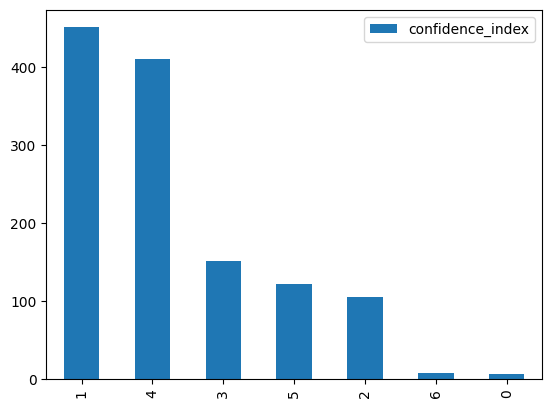

In [ ]:
# Visualize the distribution of the confidence index

counts = pd.DataFrame(dummy['confidence_index'].value_counts())
counts.plot.bar()

In [ ]:
from matplotlib.font_manager import X11FontDirectories
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = dummy['confidence_index']
X = dummy.drop(['confidence_index'], axis = 1)


# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 0)

Depth: 1
Depth: 2
Depth: 3
Depth: 4
Depth: 5
Depth: 6
Depth: 7
Depth: 8
Depth: 9
Depth: 10


<Axes: xlabel='Depth', ylabel='Validation'>

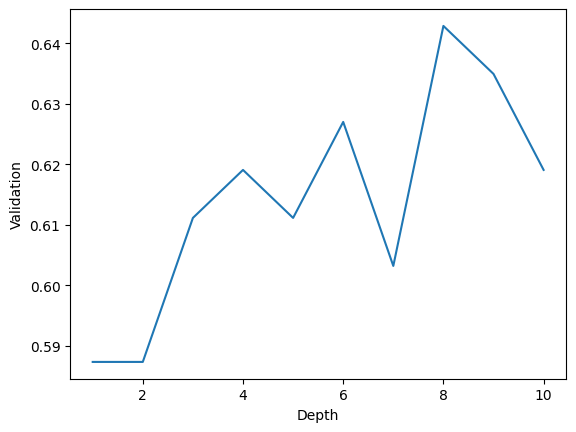

In [ ]:
# Need to finetune and fit (Best depth is at 4)

validation = []
max_depth = []

for depth in range(1, 11):
  print(f"Depth: {depth}")
  DecisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth, random_state = 0)
  DecisionTree.fit(X_train, Y_train)
  y_predicted = DecisionTree.predict(X_val)
  accuracy = accuracy_score(Y_val, y_predicted)

  validation.append(accuracy)
  max_depth.append(depth)

results = pd.DataFrame({'Validation': validation, 'Depth': max_depth})

sns.lineplot(results, x = 'Depth', y = 'Validation')

In [ ]:
# Further Fine Tuning: No signs of overfitting/underfitting

DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 0)
DecisionTree.fit(X_train, Y_train)
y_train_pred = DecisionTree.predict(X_train)
train_acc = accuracy_score(y_train_pred, Y_train)
print(f"Training Accuracy: {train_acc}")

# Validation
y_predicted = DecisionTree.predict(X_val)
accuracy = accuracy_score(Y_val, y_predicted)

print(f'Validation Accuracy: {accuracy}')

Training Accuracy: 0.6912350597609562
Validation Accuracy: 0.626984126984127


In [ ]:
# Test Set

y_predicted = DecisionTree.predict(X_test)
accuracy = accuracy_score(Y_test, y_predicted)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.6825396825396826


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test, y_predicted)

array([[49,  1,  0,  0,  2,  0],
       [ 4,  1,  0,  2,  1,  0],
       [ 5,  1,  2,  5,  1,  0],
       [ 4,  0,  0, 28,  6,  0],
       [ 3,  1,  0,  3,  6,  0],
       [ 0,  0,  0,  1,  0,  0]])

In [ ]:
# Report Matrix
from sklearn.metrics import confusion_matrix, classification_report

report = pd.DataFrame(classification_report(Y_test, y_predicted, output_dict = True))
report.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.753846,0.250000,1.000000,0.717949,0.375000,0.0,0.68254,0.516132,0.693310
recall,0.942308,0.125000,0.142857,0.736842,0.461538,0.0,0.68254,0.401424,0.682540
f1-score,0.837607,0.166667,0.250000,0.727273,0.413793,0.0,0.68254,0.399223,0.646068
support,52.000000,8.000000,14.000000,38.000000,13.000000,1.0,0.68254,126.000000,126.000000


In [ ]:
# Visualize the Tree
from sklearn.tree import export_text

tree_rules = export_text(DecisionTree.fit(X_train, Y_train), feature_names = list(X_train.columns))
print(tree_rules)

|--- Myanmar Rights Views <= 0.50
|   |--- Sex <= 0.50
|   |   |--- Where do you think you will be in six months from now? <= 5.50
|   |   |   |--- Camp Condition <= 0.50
|   |   |   |   |--- How satisfied are you with the income your family makes in the camp? <= 0.50
|   |   |   |   |   |--- Access to Help <= 1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Access to Help >  1.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- How satisfied are you with the income your family makes in the camp? >  0.50
|   |   |   |   |   |--- Access to Help <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Access to Help >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Camp Condition >  0.50
|   |   |   |   |--- Camp Condition <= 1.50
|   |   |   |   |   |--- How satisfied are you with the income your family makes in the camp? <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- How satisfied are you with the income yo